<a href="https://colab.research.google.com/github/raffeekk/ML25/blob/main/homework/homework-practice-01-linregr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [46]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [47]:
def max_element(arr):
    # Проверяем, есть ли нулевые элементы в массиве
    if 0 not in arr:
        return None

    # Находим индексы нулевых элементов
    zero_indices = np.where(arr == 0)[0]

    # Вычисляем индексы элементов, идущих сразу после нулей
    next_indices = zero_indices + 1

    # Фильтруем индексы, чтобы они не выходили за пределы массива
    valid_indices = next_indices[next_indices < len(arr)]

    # Если таких индексов нет, возвращаем None
    if len(valid_indices) == 0:
        return None

    # Возвращаем максимальное значение среди элементов с этими индексами
    return np.max(arr[valid_indices])

# Пример использования
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print("Максимальный элемент после нуля:", max_element(x))  # Output: 5

Максимальный элемент после нуля: 5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [48]:
def nearest_value(X, v):
    # Находим абсолютную разницу между каждым элементом матрицы и числом v
    diff = np.abs(X - v)

    # Находим индекс минимальной разницы
    min_index = np.unravel_index(np.argmin(diff), X.shape)

    # Возвращаем соответствующий элемент матрицы
    return X[min_index]

# Пример использования
X = np.arange(0, 10).reshape((2, 5))
v = 3.6
print("Ближайший элемент к", v, "в матрице:\n", X)
print(nearest_value(X, v))  # Output: 4

Ближайший элемент к 3.6 в матрице:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [49]:
def scale(X):
    # Вычисляем среднее значение каждого столбца
    mean = X.mean(axis=0)

    # Вычисляем стандартное отклонение каждого столбца
    std = X.std(axis=0)

    # Заменяем нулевые стандартные отклонения на 1, чтобы избежать деления на ноль
    std[std == 0] = 1

    # Масштабируем каждый столбец
    return (X - mean) / std

# Тестирование
X = np.random.randint(0, 10, (5, 4))
print("Исходная матрица:\n", X)
print("Масштабированная матрица:\n", scale(X))

Исходная матрица:
 [[0 2 9 5]
 [9 0 7 2]
 [9 3 5 9]
 [3 7 1 6]
 [4 6 5 7]]
Масштабированная матрица:
 [[-1.41990459 -0.62092042  1.35680105 -0.34554737]
 [ 1.13592367 -1.39707095  0.60302269 -1.64135001]
 [ 1.13592367 -0.23284516 -0.15075567  1.38218948]
 [-0.56796183  1.31945589 -1.6583124   0.08638684]
 [-0.28398092  0.93138063 -0.15075567  0.51832106]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [50]:
def get_stats(X):
    # Проверяем, является ли матрица квадратной
    if X.shape[0] != X.shape[1]:
        raise ValueError("Матрица должна быть квадратной!")

    # Определитель матрицы
    det = np.linalg.det(X)

    # След матрицы (сумма диагональных элементов)
    trace = np.trace(X)

    # Минимальный и максимальный элементы матрицы
    min_val = np.min(X)
    max_val = np.max(X)

    # Норма Фробениуса (квадратный корень из суммы квадратов всех элементов)
    frobenius_norm = np.linalg.norm(X, 'fro')

    # Собственные числа матрицы
    eigenvalues = np.linalg.eigvals(X)

    # Обратная матрица (если она существует)
    try:
        inv_matrix = np.linalg.inv(X)
    except np.linalg.LinAlgError:
        inv_matrix = None

    return det, trace, min_val, max_val, frobenius_norm, eigenvalues, inv_matrix

# Тестирование
X = np.random.normal(10, 1, (5, 5))  # Генерация матрицы размера 5x5 с элементами из N(10, 1)
properties = get_stats(X)

print("Матрица:\n", X)
print("Определитель:", properties[0])
print("След:", properties[1])
print("Наименьший элемент:", properties[2])
print("Наибольший элемент:", properties[3])
print("Норма Фробениуса:", properties[4])
print("Собственные числа:", properties[5])
print("Обратная матрица:\n", properties[6])

Матрица:
 [[ 7.25489832  8.15085662  9.40282568 11.83520321 10.9362784 ]
 [ 9.4267188   9.68944791 11.41037901 10.65529391  9.81928378]
 [ 8.86626183  9.92728699 10.41333261 10.87597934  9.95508788]
 [11.23290856 10.60079152 10.94015622 10.99940894 10.96030578]
 [ 9.75637293 10.96097651  9.81880616  9.77051122 10.86042077]]
Определитель: 109.34786092662519
След: 49.217508556944466
Наименьший элемент: 7.254898321625708
Наибольший элемент: 11.835203207601941
Норма Фробениуса: 51.16203399717772
Собственные числа: [51.00151426+0.j         -2.64212137+0.j          0.79221818+0.69973511j
  0.79221818-0.69973511j -0.7263207 +0.j        ]
Обратная матрица:
 [[-0.08470015 -0.24675281 -0.07401659  0.66780236 -0.29770817]
 [-0.30073136 -0.44217454  0.91805492 -0.31327233  0.17724564]
 [ 0.02122914  0.93945924 -0.67120811 -0.40812037  0.15635446]
 [-0.03780495 -0.72892019  1.0692463   0.30750725 -0.59333747]
 [ 0.39442344  0.47434921 -1.21517074 -0.19141122  0.57306831]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [51]:
results = []

# Повторяем эксперимент 100 раз
for _ in range(100):
    # Генерируем две матрицы размера 10x10 из стандартного нормального распределения
    A = np.random.standard_normal((10, 10))
    B = np.random.standard_normal((10, 10))

    # Перемножаем матрицы
    product = A @ B  # Матричное умножение

    # Находим максимальный элемент в результате
    max_element = np.max(product)

    # Сохраняем результат
    results.append(max_element)

# Вычисляем среднее значение максимальных элементов
mean_value = np.mean(results)

# Вычисляем 95-процентную квантиль
quantile_95 = np.quantile(results, 0.95)

mean_value, quantile_95

(8.271902149416517, 10.855687560075)

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [52]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [53]:
# Загрузка данных из GitHub
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Проверяем первые несколько строк для понимания структуры данных
print(flights.head())

# Описания кодов отмены:
# A - Carrier (Авиакомпания)
# B - Weather (Погода)
# C - NAS (Национальная система управления воздушным движением)
# D - Security (Безопасность)

# Удалим пропущенные значения в столбце 'CancellationCode', так как они не влияют на подсчет
flights_cleaned = flights.dropna(subset=['CancellationCode'])

# Подсчитываем количество каждого уникального значения в столбце 'CancellationCode'
cancellation_counts = flights_cleaned['CancellationCode'].value_counts()

# Находим самый частый код отмены
most_frequent_cancellation_code = cancellation_counts.idxmax()
most_frequent_count = cancellation_counts.max()

# Выводим результат
print(f"Самая частая причина отмены рейса: {most_frequent_cancellation_code} ({most_frequent_count} раз)")

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      6          18          3   2111.0        2055   2308.0   
1  2008      6           4          3   1426.0        1410   1730.0   
2  2008      8           3          7   1143.0        1145   1501.0   
3  2008      1          23          3   1141.0        1144   1323.0   
4  2008      5           4          7    815.0         820   1243.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2300            WN        242  ...    3.0      8.0          0   
1        1728            XE       2380  ...    4.0     12.0          0   
2        1520            WN       1769  ...    4.0      9.0          0   
3        1335            OO       3802  ...    4.0     19.0          0   
4        1300            WN        399  ...    4.0      8.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN   

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [54]:
import pandas as pd

# Загрузка данных из GitHub
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Проверяем первые несколько строк для понимания структуры данных
print(flights.head())

# Удаляем строки с пропущенными значениями в столбце 'Distance'
flights_cleaned = flights.dropna(subset=['Distance'])

# Вычисляем статистические показатели для столбца 'Distance'
distance_stats = {
    'Среднее': flights_cleaned['Distance'].mean(),
    'Минимальное': flights_cleaned['Distance'].min(),
    'Максимальное': flights_cleaned['Distance'].max()
}

# Выводим результаты
for stat, value in distance_stats.items():
    print(f"{stat} расстояние: {value:.2f} миль")

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      6          18          3   2111.0        2055   2308.0   
1  2008      6           4          3   1426.0        1410   1730.0   
2  2008      8           3          7   1143.0        1145   1501.0   
3  2008      1          23          3   1141.0        1144   1323.0   
4  2008      5           4          7    815.0         820   1243.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2300            WN        242  ...    3.0      8.0          0   
1        1728            XE       2380  ...    4.0     12.0          0   
2        1520            WN       1769  ...    4.0      9.0          0   
3        1335            OO       3802  ...    4.0     19.0          0   
4        1300            WN        399  ...    4.0      8.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN   

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [55]:
import pandas as pd

# Загрузка данных из GitHub
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Удаляем строки с пропущенными значениями в столбце 'Distance'
flights_cleaned = flights.dropna(subset=['Distance'])

# Находим минимальное расстояние
min_distance = flights_cleaned['Distance'].min()

# Фильтруем данные, где расстояние равно минимальному
min_distance_flights = flights_cleaned[flights_cleaned['Distance'] == min_distance]

# Выводим информацию о рейсах с минимальным расстоянием
print(f"Минимальное расстояние: {min_distance} миль")
print("\nРейсы с минимальным расстоянием:")
display(min_distance_flights[['Year', 'Month', 'DayofMonth', 'FlightNum', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']])

# Для каждого уникального номера рейса (FlightNum) проверяем расстояние в другие дни
unique_flights = min_distance_flights['FlightNum'].unique()
print("\nПроверка расстояний для этих рейсов в другие дни:")
for flight_num in unique_flights:
    # Выбираем все записи для данного рейса, кроме тех, где расстояние минимальное
    other_days_distances = flights_cleaned[
        (flights_cleaned['FlightNum'] == flight_num) & (flights_cleaned['Distance'] != min_distance)
    ]['Distance']

    if not other_days_distances.empty:
        print(f"Рейс {flight_num}: Расстояния в другие дни — {list(other_days_distances.unique())}")
    else:
        print(f"Рейс {flight_num}: Нет других записей с этим номером рейса.")

Минимальное расстояние: 31 миль

Рейсы с минимальным расстоянием:


,Year,Month,DayofMonth,FlightNum,UniqueCarrier,Origin,Dest,Distance
1116,2008,12,30,65,AS,WRG,PSG,31
6958,2008,12,26,65,AS,WRG,PSG,31
17349,2008,8,18,64,AS,PSG,WRG,31
27534,2008,3,11,64,AS,PSG,WRG,31
46082,2008,8,9,65,AS,WRG,PSG,31
48112,2008,2,28,64,AS,PSG,WRG,31



Проверка расстояний для этих рейсов в другие дни:
Рейс 65: Расстояния в другие дни — [680, 82, 571, 2454, 1005, 581, 1747, 123, 281, 682, 372, 386]
Рейс 64: Расстояния в другие дни — [533, 680, 2381, 82, 1005, 123, 359, 1747, 372, 883, 571, 414]


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [56]:
import pandas as pd

# Загрузка данных о рейсах
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Подсчет количества вылетов для каждого аэропорта
departure_counts = flights['Origin'].value_counts()

# Находим аэропорт с максимальным количеством вылетов
most_flights_airport = departure_counts.idxmax()
most_flights_count = departure_counts.max()

print(f"Аэропорт с наибольшим количеством вылетов: {most_flights_airport} ({most_flights_count} вылетов)")

# Загрузка дополнительных данных об аэропортах
airports = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
                       header=None,
                       names=['AirportID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude',
                              'Altitude', 'Timezone', 'DST', 'TzDatabaseTimezone', 'Type', 'Source'])

# Фильтруем данные, чтобы найти город для найденного аэропорта
airport_info = airports[airports['IATA'] == most_flights_airport]

if not airport_info.empty:
    city = airport_info['City'].values[0]
    print(f"Город, в котором находится аэропорт: {city}")
else:
    print("Информация об аэропорте не найдена.")

Аэропорт с наибольшим количеством вылетов: ATL (4134 вылетов)
Город, в котором находится аэропорт: Atlanta


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [57]:
import pandas as pd

# Загрузка данных о рейсах
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Удаляем строки с пропущенными значениями в столбцах 'AirTime' и 'Origin'
flights_cleaned = flights.dropna(subset=['AirTime', 'Origin'])

# Группируем данные по аэропорту отправления и вычисляем среднее время полета
average_airtime_by_airport = flights_cleaned.groupby('Origin')['AirTime'].mean()

# Находим аэропорт с максимальным средним временем полета
airport_with_max_airtime = average_airtime_by_airport.idxmax()
max_average_airtime = average_airtime_by_airport.max()

print(f"Аэропорт с наибольшим средним временем полета: {airport_with_max_airtime}")
print(f"Среднее время полета: {max_average_airtime:.2f} минут")

Аэропорт с наибольшим средним временем полета: SJU
Среднее время полета: 205.20 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [58]:
import pandas as pd

# Загрузка данных о рейсах
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Удаляем строки с пропущенными значениями в столбцах 'DepDelay' и 'Origin'
flights_cleaned = flights.dropna(subset=['DepDelay', 'Origin'])

# Добавляем столбец, указывающий, был ли рейс задержан, используя .loc
flights_cleaned = flights_cleaned.copy()  # Создаем явную копию, чтобы избежать предупреждения
flights_cleaned.loc[:, 'IsDelayed'] = flights_cleaned['DepDelay'] > 0

# Группируем данные по аэропорту отправления и считаем общее количество рейсов и количество задержанных рейсов
delay_stats = flights_cleaned.groupby('Origin').agg(
    TotalFlights=('DepDelay', 'count'),  # Общее количество рейсов
    DelayedFlights=('IsDelayed', 'sum')  # Количество задержанных рейсов
)

# Вычисляем долю задержанных рейсов
delay_stats['DelayRatio'] = delay_stats['DelayedFlights'] / delay_stats['TotalFlights']

# Фильтруем аэропорты с менее чем 1000 вылетами
delay_stats_filtered = delay_stats[delay_stats['TotalFlights'] >= 1000]

# Находим аэропорт с максимальной долей задержек
airport_with_max_delay_ratio = delay_stats_filtered['DelayRatio'].idxmax()
max_delay_ratio = delay_stats_filtered['DelayRatio'].max()

print(f"Аэропорт с наибольшей долей задержек: {airport_with_max_delay_ratio}")
print(f"Доля задержек: {max_delay_ratio:.2%}")

Аэропорт с наибольшей долей задержек: EWR
Доля задержек: 52.87%


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [59]:
import pandas as pd

# Загрузка данных
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Проверяем наличие пропущенных значений в датасете
print("Имеются ли пропущенные значения? ", flights.isnull().values.any())

# Считаем общее количество пропущенных элементов в таблице
total_missing_values = flights.isnull().sum().sum()
print(f"Общее количество пропущенных элементов: {total_missing_values}")

# Находим количество объектов (строк), имеющих хотя бы один пропуск
rows_with_missing = flights[flights.isnull().any(axis=1)]
print(f"Количество объектов с хотя бы одним пропуском: {len(rows_with_missing)}")

# Находим количество признаков (столбцов), имеющих хотя бы одно пропущенное значение
columns_with_missing = flights.columns[flights.isnull().any()]
print(f"Количество признаков с пропущенными значениями: {len(columns_with_missing)}")
print(f"Признаки с пропущенными значениями: {list(columns_with_missing)}")

Имеются ли пропущенные значения?  True
Общее количество пропущенных элементов: 355215
Количество объектов с хотя бы одним пропуском: 70000
Количество признаков с пропущенными значениями: 16
Признаки с пропущенными значениями: ['DepTime', 'ArrTime', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [60]:
# Проверяем наличие пропущенных значений в целевой переменной
target_variable = 'DepDelay'
missing_in_target = flights[target_variable].isnull().sum()
print(f"Пропущенных значений в целевой переменной: {missing_in_target}")

# Анализируем объекты с пропущенными значениями целевой переменной
flights_with_missing_target = flights[flights[target_variable].isnull()]
print("\nАнализ объектов с пропущенными значениями целевой переменной:")
display(flights_with_missing_target.describe())

# Исключаем объекты с пропущенным значением целевой переменной
flights_cleaned = flights.dropna(subset=[target_variable])

# Исключаем объекты со значением целевой переменной, равным 0
flights_cleaned = flights_cleaned[flights_cleaned[target_variable] != 0]

# Выделяем целевую переменную в отдельный вектор
y = flights_cleaned[target_variable]
X = flights_cleaned.drop(columns=[target_variable])

print(f"\nРазмерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

Пропущенных значений в целевой переменной: 1399

Анализ объектов с пропущенными значениями целевой переменной:


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1399.0,1399.000000,1399.000000,1399.000000,0.0,1399.000000,0.0,1399.000000,1399.000000,0.0,...,1399.000000,0.0,0.0,1399.0,1399.0,0.0,0.0,0.0,0.0,0.0
mean,2008.0,5.646891,15.562545,3.987848,NaN,1379.989993,NaN,1543.809149,2789.937098,NaN,...,585.818442,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
std,0.0,3.705114,8.585107,2.018653,NaN,462.847110,NaN,480.819451,2131.389377,NaN,...,461.874840,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,2008.0,1.000000,1.000000,1.000000,NaN,50.000000,NaN,2.000000,5.000000,NaN,...,31.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
25%,2008.0,2.000000,9.000000,2.000000,NaN,1000.000000,NaN,1145.000000,895.000000,NaN,...,256.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
50%,2008.0,5.000000,15.000000,4.000000,NaN,1420.000000,NaN,1605.000000,2309.000000,NaN,...,448.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
75%,2008.0,9.000000,22.000000,6.000000,NaN,1755.000000,NaN,1940.000000,4444.000000,NaN,...,761.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
max,2008.0,12.000000,31.000000,7.000000,NaN,2359.000000,NaN,2359.000000,7794.000000,NaN,...,2704.000000,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN



Размерность X: (63404, 28)
Размерность y: (63404,)


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [61]:
import pandas as pd
import numpy as np

# Загрузка данных (если еще не загружены)
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Функция для разделения времени на часы и минуты
def split_time(df, column_name):
    """
    Разделяет значение в формате hhmm на часы и минуты.
    Если значение пропущено, возвращает NaN для обоих новых признаков.
    """
    # Создаем новые столбцы для часов и минут
    df[f"{column_name}_Hour"] = np.where(
        df[column_name].notnull(),
        df[column_name] // 100,  # Целочисленное деление для получения часа
        np.nan  # Пропуск для NaN значений
    )
    df[f"{column_name}_Minute"] = np.where(
        df[column_name].notnull(),
        df[column_name] % 100,  # Остаток от деления для получения минут
        np.nan  # Пропуск для NaN значений
    )
    # Удаляем исходный столбец
    df.drop(columns=[column_name], inplace=True)

# Применяем функцию к каждому из указанных признаков
time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for col in time_columns:
    if col in flights.columns:
        split_time(flights, col)

# Проверяем результат
print("Первые несколько строк после преобразования:")
display(flights.head())

Первые несколько строк после преобразования:


,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20.0,55.0,23.0,8.0,23.0,0.0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14.0,10.0,17.0,30.0,17.0,28.0
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11.0,45.0,15.0,1.0,15.0,20.0
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11.0,44.0,13.0,23.0,13.0,35.0
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8.0,20.0,12.0,43.0,13.0,0.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [62]:
# Список признаков для исключения
features_to_drop = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'TailNum', 'Year']

# Проверяем наличие этих признаков в датасете и исключаем их
flights_cleaned = flights.drop(columns=features_to_drop, errors='ignore')

# Проверяем результат
print("Оставшиеся признаки после исключения:")
print(flights_cleaned.columns.tolist())

Оставшиеся признаки после исключения:
['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'AirTime', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Загрузка данных (если еще не загружены)
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Исключаем целевую переменную и предыдущие исключения
features_to_drop = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'TailNum', 'Year', 'DepDelay']
X = flights.drop(columns=features_to_drop, errors='ignore')
y = flights['DepDelay']

# Разделение признаков на вещественные и категориальные
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Создаем трансформеры для обработки данных
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Заполняем пропуски медианой
    ('scaler', StandardScaler())  # Стандартизация
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполняем пропуски наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Объединяем трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применяем преобразования к данным
X_prepared = preprocessor.fit_transform(X)

# Проверяем результат
print(f"Размерность преобразованных данных: {X_prepared.shape}")

Размерность преобразованных данных: (70000, 638)


<Axes: >

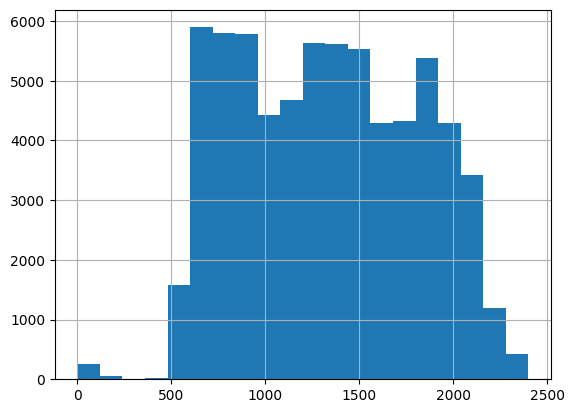

In [64]:
X['DepTime'].hist(bins=20)

<Axes: >

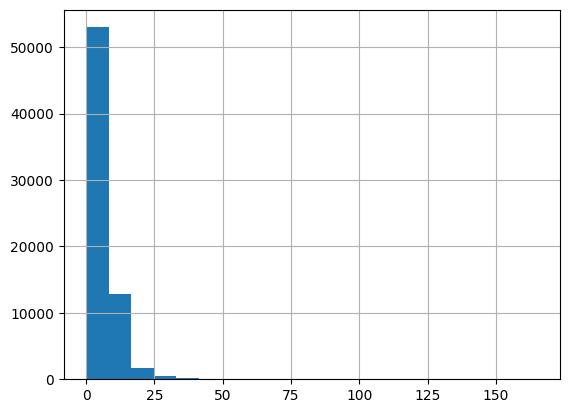

In [65]:
X['TaxiIn'].hist(bins=20)

<Axes: >

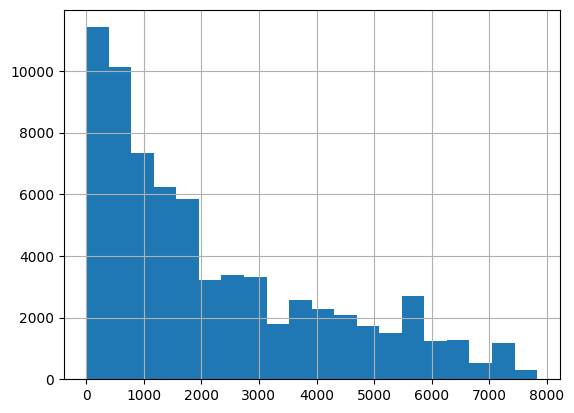

In [66]:
X['FlightNum'].hist(bins=20)

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):
    # Копируем DataFrame, чтобы не изменять исходные данные
    data_transformed = data.copy()

    # Разделяем признаки на вещественные и категориальные
    numeric_features = data_transformed.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = data_transformed.select_dtypes(include=['object']).columns.tolist()

    # 1. Замена пропущенных значений
    # Для вещественных признаков заменяем NaN на 0
    data_transformed[numeric_features] = data_transformed[numeric_features].fillna(0)
    # Для категориальных признаков заменяем NaN на строку 'nan'
    data_transformed[categorical_features] = data_transformed[categorical_features].fillna('nan')

    # 2. Масштабирование вещественных признаков
    scaler = StandardScaler()
    data_transformed[numeric_features] = scaler.fit_transform(data_transformed[numeric_features])

    # 3. One-hot-кодирование категориальных признаков
    if len(categorical_features) > 0:
        # Преобразуем категориальные признаки в словарь для DictVectorizer
        categorical_data = data_transformed[categorical_features].to_dict(orient='records')

        # Применяем DictVectorizer
        vec = DictVectorizer(sparse=False)
        categorical_encoded = vec.fit_transform(categorical_data)

        # Создаем DataFrame для закодированных категориальных признаков
        categorical_encoded_df = pd.DataFrame(
            categorical_encoded,
            columns=vec.get_feature_names_out(),
            index=data_transformed.index
        )

        # Удаляем исходные категориальные признаки
        data_transformed.drop(columns=categorical_features, inplace=True)

        # Добавляем закодированные категориальные признаки
        data_transformed = pd.concat([data_transformed, categorical_encoded_df], axis=1)

    return data_transformed

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [68]:
import pandas as pd

# Загрузка данных
flights = pd.read_csv("https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/2008.csv")

# Исключаем целевую переменную и предыдущие исключения
features_to_drop = ['ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'TailNum', 'Year', 'DepDelay']
X = flights.drop(columns=features_to_drop, errors='ignore')

# Применяем функцию transform_data
X_transformed = transform_data(X)

# Проверяем размерность преобразованных данных
print(f"Размерность преобразованных данных: {X_transformed.shape}")
print(f"Количество признаков после преобразования: {X_transformed.shape[1]}")

Размерность преобразованных данных: (70000, 639)
Количество признаков после преобразования: 639


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [69]:
from sklearn.model_selection import train_test_split

# Предположим, что у нас уже есть преобразованные данные X_transformed и целевая переменная y
# Если нет, то загрузите данные и примените функцию transform_data

# Разбиваем данные на обучающую и тестовую выборки в отношении 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,  # Матрица признаков после преобразования
    y,              # Вектор целевой переменной
    test_size=0.3,  # 30% данных для тестовой выборки
    random_state=42 # Фиксируем случайность для воспроизводимости результатов
)

# Проверяем размеры полученных выборок
print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test): {X_test.shape}")
print(f"Размер вектора целевой переменной для обучающей выборки (y_train): {y_train.shape}")
print(f"Размер вектора целевой переменной для тестовой выборки (y_test): {y_test.shape}")

Размер обучающей выборки (X_train): (49000, 639)
Размер тестовой выборки (X_test): (21000, 639)
Размер вектора целевой переменной для обучающей выборки (y_train): (49000,)
Размер вектора целевой переменной для тестовой выборки (y_test): (21000,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Убедимся, что в данных нет NaN
# Сброс индексов для синхронизации X_train и y_train
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Создаем маску для удаления строк с NaN в y_train
non_nan_indices_train = ~np.isnan(y_train_reset)

# Применяем маску к X_train и y_train
X_train_clean = X_train_reset[non_nan_indices_train]
y_train_clean = y_train_reset[non_nan_indices_train]

# Используем только первые 1000 объектов из очищенной обучающей выборки
X_train_subset = X_train_clean[:1000]
y_train_subset = y_train_clean[:1000]

# Обрабатываем тестовую выборку
# Сброс индексов для синхронизации X_test и y_test
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Создаем маску для удаления строк с NaN в y_test
non_nan_indices_test = ~np.isnan(y_test_reset)

# Применяем маску к X_test и y_test
X_test_clean = X_test_reset[non_nan_indices_test]
y_test_clean = y_test_reset[non_nan_indices_test]

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_subset, y_train_subset)

# Предсказания на обучающей подвыборке и тестовой выборке
y_train_pred = model.predict(X_train_subset)
y_test_pred = model.predict(X_test_clean)

# Проверяем, есть ли NaN в предсказаниях
if np.any(np.isnan(y_test_pred)):
    print("Внимание: Предсказания модели содержат NaN. Заменяем их на 0.")
    y_test_pred = np.nan_to_num(y_test_pred)

# Вычисляем метрики MSE и R^2
mse_train = mean_squared_error(y_train_subset, y_train_pred)
r2_train = r2_score(y_train_subset, y_train_pred)

mse_test = mean_squared_error(y_test_clean, y_test_pred)
r2_test = r2_score(y_test_clean, y_test_pred)

# Выводим результаты
print(f"MSE на обучающей подвыборке: {mse_train:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train:.2f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")
print(f"R^2 на тестовой выборке: {r2_test:.2f}")

# Анализ коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_train_subset.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nНаиболее значимые коэффициенты модели:")
display(coefficients.head(10))

MSE на обучающей подвыборке: 43.98
R^2 на обучающей подвыборке: 0.96
MSE на тестовой выборке: 103.00
R^2 на тестовой выборке: 0.92

Наиболее значимые коэффициенты модели:


,Feature,Coefficient
382,Origin=CLL,38.052059
453,Origin=HSV,-31.850781
311,Dest=TXK,25.142931
483,Origin=LGB,24.554582
18,LateAircraftDelay,21.160285
484,Origin=LIH,-20.911948
293,Dest=SPS,20.409152
584,Origin=SJU,-19.992674
14,CarrierDelay,19.680913
434,Origin=GJT,18.738057


[Текст ссылки](https://)Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [71]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Удаляем строки с пропущенными значениями в y_test и соответствующие строки в X_test
non_nan_indices_test = ~np.isnan(y_test)  # Находим индексы, где y_test не содержит NaN
X_test_clean = X_test[non_nan_indices_test]
y_test_clean = y_test[non_nan_indices_test]

# Используем только первые 1000 объектов из очищенной обучающей выборки
X_train_subset = X_train_clean[:1000]
y_train_subset = y_train_clean[:1000]

# Сетка значений alpha для поиска оптимального параметра регуляризации
alpha_grid = [0.01, 0.1, 1, 10, 100]

# 1. LassoCV (L1-регуляризация)
lasso_cv = LassoCV(alphas=alpha_grid, cv=5, random_state=42)
lasso_cv.fit(X_train_subset, y_train_subset)

# Лучшее значение alpha для Lasso
best_alpha_lasso = lasso_cv.alpha_
print(f"Лучшее значение alpha для Lasso: {best_alpha_lasso}")

# Предсказания на обучающей подвыборке и очищенной тестовой выборке
y_train_pred_lasso = lasso_cv.predict(X_train_subset)
y_test_pred_lasso = lasso_cv.predict(X_test_clean)

# Проверяем, есть ли NaN в предсказаниях
if np.any(np.isnan(y_test_pred_lasso)):
    print("Внимание: Предсказания Lasso содержат NaN. Заменяем их на 0.")
    y_test_pred_lasso = np.nan_to_num(y_test_pred_lasso)

# Вычисляем метрики для Lasso
mse_train_lasso = mean_squared_error(y_train_subset, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train_subset, y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test_clean, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test_clean, y_test_pred_lasso)

print("\nМетрики для Lasso:")
print(f"MSE на обучающей подвыборке: {mse_train_lasso:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train_lasso:.2f}")
print(f"MSE на тестовой выборке: {mse_test_lasso:.2f}")
print(f"R^2 на тестовой выборке: {r2_test_lasso:.2f}")

# 2. RidgeCV (L2-регуляризация)
ridge_cv = RidgeCV(alphas=alpha_grid, cv=5)
ridge_cv.fit(X_train_subset, y_train_subset)

# Лучшее значение alpha для Ridge
best_alpha_ridge = ridge_cv.alpha_
print(f"\nЛучшее значение alpha для Ridge: {best_alpha_ridge}")

# Предсказания на обучающей подвыборке и очищенной тестовой выборке
y_train_pred_ridge = ridge_cv.predict(X_train_subset)
y_test_pred_ridge = ridge_cv.predict(X_test_clean)

# Проверяем, есть ли NaN в предсказаниях
if np.any(np.isnan(y_test_pred_ridge)):
    print("Внимание: Предсказания Ridge содержат NaN. Заменяем их на 0.")
    y_test_pred_ridge = np.nan_to_num(y_test_pred_ridge)

# Вычисляем метрики для Ridge
mse_train_ridge = mean_squared_error(y_train_subset, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train_subset, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test_clean, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test_clean, y_test_pred_ridge)

print("\nМетрики для Ridge:")
print(f"MSE на обучающей подвыборке: {mse_train_ridge:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train_ridge:.2f}")
print(f"MSE на тестовой выборке: {mse_test_ridge:.2f}")
print(f"R^2 на тестовой выборке: {r2_test_ridge:.2f}")

Лучшее значение alpha для Lasso: 0.1

Метрики для Lasso:
MSE на обучающей подвыборке: 74.26
R^2 на обучающей подвыборке: 0.93
MSE на тестовой выборке: 94.82
R^2 на тестовой выборке: 0.93

Лучшее значение alpha для Ridge: 10.0

Метрики для Ridge:
MSE на обучающей подвыборке: 60.40
R^2 на обучающей подвыборке: 0.94
MSE на тестовой выборке: 91.57
R^2 на тестовой выборке: 0.93


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [72]:
import numpy as np

# Проверяем размерности данных до добавления единичного признака
print(f"Размерность обучающей выборки до добавления единичного признака: {X_train.shape}")
print(f"Размерность тестовой выборки до добавления единичного признака: {X_test.shape}")

# Добавляем единичный признак к обучающей выборке
X_train_with_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

# Добавляем единичный признак к тестовой выборке
X_test_with_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Проверяем размерности после добавления единичного признака
print(f"\nРазмерность обучающей выборки после добавления единичного признака: {X_train_with_bias.shape}")
print(f"Размерность тестовой выборки после добавления единичного признака: {X_test_with_bias.shape}")

Размерность обучающей выборки до добавления единичного признака: (49000, 639)
Размерность тестовой выборки до добавления единичного признака: (21000, 639)

Размерность обучающей выборки после добавления единичного признака: (49000, 640)
Размерность тестовой выборки после добавления единичного признака: (21000, 640)


**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [73]:
def make_pred(X, w):
    """
    Возвращает вектор прогнозов линейной модели с вектором весов w для выборки X.
    """
    return np.dot(X, w)

In [74]:
def get_func(w, X, y):
    """
    Возвращает значение функционала MSPE для выборки (X, y) и вектора весов w.
    """
    predictions = make_pred(X, w)
    # Избегаем деления на ноль, используя np.where
    errors = np.where(y == 0, 0, (predictions - y) / y)
    mspe = np.mean(errors ** 2)
    return mspe

In [75]:
def get_grad(w, X, y):
    """
    Возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w.
    """
    predictions = make_pred(X, w)
    # Избегаем деления на ноль, используя np.where
    errors = np.where(y == 0, 0, (predictions - y) / y)
    grad = (2 / len(y)) * np.dot(X.T, errors)
    return grad

In [76]:
def get_reg_func(w, X, y, lambda_):
    """
    Возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w.
    """
    mspe = get_func(w, X, y)
    reg_term = lambda_ * np.sum(w ** 2)  # Регуляризационный член
    return mspe + reg_term

In [77]:
def get_reg_grad(w, X, y, lambda_):
    """
    Возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w.
    """
    grad = get_grad(w, X, y)
    reg_grad = 2 * lambda_ * w  # Градиент регуляризационного члена
    return grad + reg_grad

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.

Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [78]:
import numpy as np

def grad_descent(X, y, step_size, max_iter, eps, is_reg=False, lambda_=0.1):
    """
    Реализация метода градиентного спуска для минимизации MSPE или регуляризованного MSPE.
    """
    # Инициализируем вектор весов нулями
    w = np.zeros(X.shape[1])
    func_values = []

    for i in range(max_iter):
        # Вычисляем значение функционала и его градиент
        if is_reg:
            func_value = get_reg_func(w, X, y, lambda_)
            grad = get_reg_grad(w, X, y, lambda_)
        else:
            func_value = get_func(w, X, y)
            grad = get_grad(w, X, y)

        # Сохраняем значение функционала на текущей итерации
        func_values.append(func_value)

        # Клиппирование градиента для предотвращения переполнения
        grad = np.clip(grad, -1e6, 1e6)  # Ограничиваем значения градиента

        # Обновляем вектор весов
        w_new = w - step_size * grad

        # Проверяем критерий останова
        if np.linalg.norm(w_new - w) < eps:
            break

        # Обновляем вектор весов
        w = w_new

    return w, func_values

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

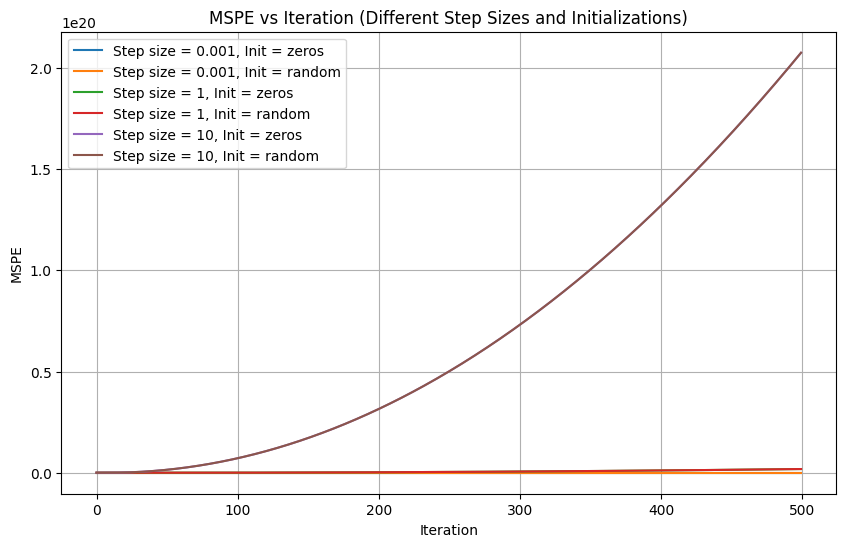

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения графиков
def plot_func_values(func_values, title):
    plt.figure(figsize=(10, 6))
    for values in func_values:
        plt.plot(values['func_values'], label=f"Step size = {values['step_size']}, Init = {values['init']}")
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("MSPE")
    plt.legend()
    plt.grid(True)
    plt.show()

# Параметры эксперимента
step_sizes = [0.001, 1, 10]  # Размеры шага
initializations = ['zeros', 'random']  # Способы инициализации весов
max_iter = 500  # Максимальное количество итераций
eps = 1e-6     # Точность останова

# Хранилище результатов
results = []

# Убедимся, что размерности X_train_with_bias и y_train_clean совпадают
# Сброс индексов для синхронизации данных
X_train_with_bias = np.hstack([np.ones((X_train_clean.shape[0], 1)), X_train_clean.values])
y_train_clean = y_train_clean.reset_index(drop=True)

if X_train_with_bias.shape[0] != y_train_clean.shape[0]:
    raise ValueError(f"Размерности X_train_with_bias ({X_train_with_bias.shape[0]}) и y_train_clean ({y_train_clean.shape[0]}) не совпадают!")

# Цикл по всем комбинациям параметров
for step_size in step_sizes:
    for init in initializations:
        # Инициализация весов
        if init == 'zeros':
            w0 = np.zeros(X_train_with_bias.shape[1])
        elif init == 'random':
            w0 = np.random.randn(X_train_with_bias.shape[1])

        # Обучение модели без регуляризации
        try:
            w_opt, func_values = grad_descent(
                X=X_train_with_bias,
                y=y_train_clean,
                step_size=step_size,
                max_iter=max_iter,
                eps=eps,
                is_reg=False
            )

            # Сохраняем результаты
            results.append({
                'step_size': step_size,
                'init': init,
                'func_values': func_values
            })
        except Exception as e:
            print(f"Ошибка при step_size={step_size}, init={init}: {e}")

# Визуализация результатов
plot_func_values(results, "MSPE vs Iteration (Different Step Sizes and Initializations)")

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

Обучение модели без регуляризации...
Обучение модели с регуляризацией...


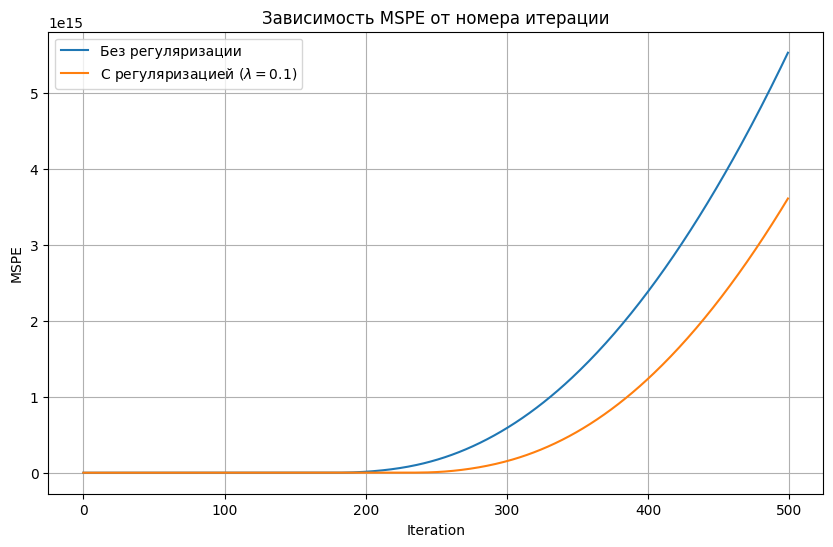

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры эксперимента
step_size = 0.1          # Размер шага
max_iter = 500           # Максимальное количество итераций
eps = 1e-6               # Точность останова
lambda_ = 0.1            # Коэффициент регуляризации

# Инициализация весов нулями
w0 = np.zeros(X_train_with_bias.shape[1])

# Обучение модели без регуляризации
print("Обучение модели без регуляризации...")
w_opt_no_reg, func_values_no_reg = grad_descent(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=step_size,
    max_iter=max_iter,
    eps=eps,
    is_reg=False
)

# Обучение модели с регуляризацией
print("Обучение модели с регуляризацией...")
w_opt_reg, func_values_reg = grad_descent(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=step_size,
    max_iter=max_iter,
    eps=eps,
    is_reg=True,
    lambda_=lambda_
)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(func_values_no_reg, label="Без регуляризации")
plt.plot(func_values_reg, label=f"С регуляризацией ($\lambda = {lambda_}$)")
plt.title("Зависимость MSPE от номера итерации")
plt.xlabel("Iteration")
plt.ylabel("MSPE")
plt.legend()
plt.grid(True)
plt.show()

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту.

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [81]:
import numpy as np

def sgd(X, y, step_size, max_iter, eps, is_reg=False, lambda_=0.1):
    """
    Реализация метода стохастического градиентного спуска (SGD) для минимизации MSPE или регуляризованного MSPE.

    Параметры:
    - X: матрица "объект-признак";
    - y: вектор целевой переменной;
    - step_size: темп обучения;
    - max_iter: максимальное число итераций;
    - eps: значение, используемое в критерии останова;
    - is_reg: бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае;
    - lambda_: коэффициент регуляризации (используется только если is_reg=True).

    Возвращает:
    - w: полученный в результате оптимизации вектор весов;
    - func_values: список значений функционала на каждой итерации.
    """
    # Инициализируем вектор весов нулями
    w = np.zeros(X.shape[1])
    func_values = []

    for i in range(max_iter):
        # Случайно выбираем один объект из выборки
        random_index = np.random.randint(0, X.shape[0])
        x_i = X[random_index]
        y_i = y[random_index]

        # Вычисляем значение функционала для всей выборки
        if is_reg:
            func_value = get_reg_func(w, X, y, lambda_)
        else:
            func_value = get_func(w, X, y)

        # Сохраняем значение функционала на текущей итерации
        func_values.append(func_value)

        # Вычисляем градиент по выбранному объекту
        if is_reg:
            grad = get_reg_grad(w, x_i.reshape(1, -1), np.array([y_i]), lambda_)
        else:
            grad = get_grad(w, x_i.reshape(1, -1), np.array([y_i]))

        # Обновляем вектор весов
        w_new = w - step_size * grad.flatten()

        # Проверяем критерий останова
        if np.linalg.norm(w_new - w) < eps:
            break

        # Обновляем вектор весов
        w = w_new

    return w, func_values

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

<ipython-input-75-f9726c87e60a>:7: RuntimeWarning: divide by zero encountered in divide
  errors = np.where(y == 0, 0, (predictions - y) / y)


Step size: 0.0001, Final MSPE: 0.9242
Step size: 0.001, Final MSPE: 0.9398
Step size: 0.01, Final MSPE: 1.0315
Step size: 0.1, Final MSPE: 2715.8925
Step size: 0.0001, Final MSPE: 0.9281
Step size: 0.001, Final MSPE: 1.0318
Step size: 0.01, Final MSPE: 9.3374
Step size: 0.1, Final MSPE: 24032.6812
Обучение модели без регуляризации...
Обучение модели с регуляризацией...


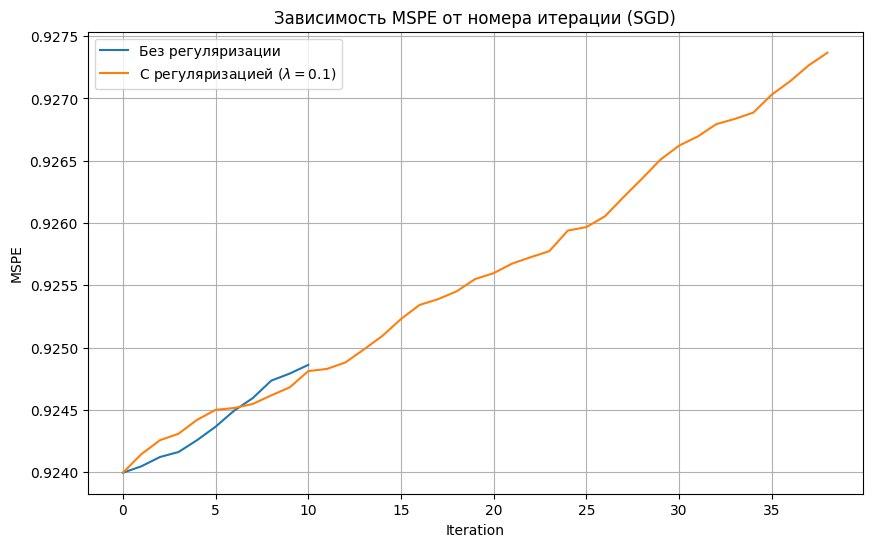

ValueError: operands could not be broadcast together with shapes (21000,) (20564,) 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Подбор оптимального step_size
def find_optimal_step_size(X, y, max_iter=100, eps=1e-6, is_reg=False, lambda_=0.1):
    step_sizes = [1e-4, 1e-3, 1e-2, 0.1]  # Варианты размера шага
    optimal_step_size = None
    min_final_mspe = float('inf')

    for step_size in step_sizes:
        try:
            w, func_values = sgd(
                X=X,
                y=y,
                step_size=step_size,
                max_iter=max_iter,
                eps=eps,
                is_reg=is_reg,
                lambda_=lambda_
            )
            final_mspe = func_values[-1]  # Значение MSPE на последней итерации
            print(f"Step size: {step_size}, Final MSPE: {final_mspe:.4f}")

            if final_mspe < min_final_mspe:
                min_final_mspe = final_mspe
                optimal_step_size = step_size
        except Exception as e:
            print(f"Ошибка при step_size={step_size}: {e}")

    return optimal_step_size

# Нахождение оптимального step_size
optimal_step_size_no_reg = find_optimal_step_size(
    X=X_train_with_bias,
    y=y_train_clean,
    is_reg=False
)

optimal_step_size_reg = find_optimal_step_size(
    X=X_train_with_bias,
    y=y_train_clean,
    is_reg=True,
    lambda_=0.1
)

# Обучение модели без регуляризации
print("Обучение модели без регуляризации...")
w_opt_no_reg, func_values_no_reg = sgd(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=optimal_step_size_no_reg,
    max_iter=500,
    eps=1e-6,
    is_reg=False
)

# Обучение модели с регуляризацией
print("Обучение модели с регуляризацией...")
w_opt_reg, func_values_reg = sgd(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=optimal_step_size_reg,
    max_iter=500,
    eps=1e-6,
    is_reg=True,
    lambda_=0.1
)

# График сходимости
plt.figure(figsize=(10, 6))
plt.plot(func_values_no_reg, label="Без регуляризации")
plt.plot(func_values_reg, label=f"С регуляризацией ($\lambda = 0.1$)")
plt.title("Зависимость MSPE от номера итерации (SGD)")
plt.xlabel("Iteration")
plt.ylabel("MSPE")
plt.legend()
plt.grid(True)
plt.show()

# Вычисление метрик на тестовой выборке
def compute_metrics(w, X, y):
    predictions = np.dot(X, w)
    mspe = get_func(w, X, y)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mspe, mse, r2

# Метрики для модели без регуляризации
mspe_no_reg, mse_no_reg, r2_no_reg = compute_metrics(w_opt_no_reg, X_test_with_bias, y_test_clean)
print(f"Метрики без регуляризации:")
print(f"MSPE: {mspe_no_reg:.4f}, MSE: {mse_no_reg:.4f}, R^2: {r2_no_reg:.4f}")

# Метрики для модели с регуляризацией
mspe_reg, mse_reg, r2_reg = compute_metrics(w_opt_reg, X_test_with_bias, y_test_clean)
print(f"\nМетрики с регуляризацией:")
print(f"MSPE: {mspe_reg:.4f}, MSE: {mse_reg:.4f}, R^2: {r2_reg:.4f}")

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

Обучение модели без регуляризации...


<ipython-input-75-f9726c87e60a>:7: RuntimeWarning: divide by zero encountered in divide
  errors = np.where(y == 0, 0, (predictions - y) / y)


Обучение модели с регуляризацией...


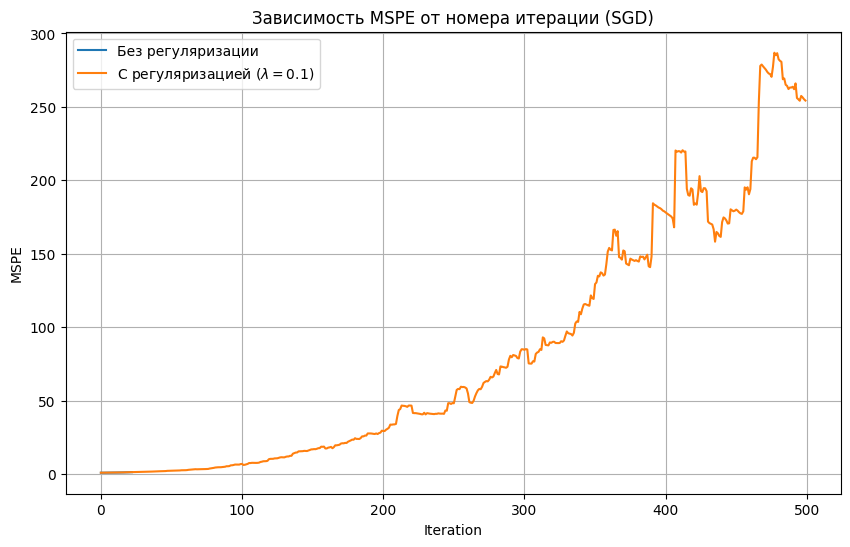

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры эксперимента
step_size = 0.01          # Размер шага
max_iter = 500            # Максимальное количество итераций
eps = 1e-6                # Точность останова
lambda_ = 0.1             # Коэффициент регуляризации

# Обучение модели без регуляризации
print("Обучение модели без регуляризации...")
w_opt_no_reg, func_values_no_reg = sgd(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=step_size,
    max_iter=max_iter,
    eps=eps,
    is_reg=False
)

# Обучение модели с регуляризацией
print("Обучение модели с регуляризацией...")
w_opt_reg, func_values_reg = sgd(
    X=X_train_with_bias,
    y=y_train_clean,
    step_size=step_size,
    max_iter=max_iter,
    eps=eps,
    is_reg=True,
    lambda_=lambda_
)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(func_values_no_reg, label="Без регуляризации")
plt.plot(func_values_reg, label=f"С регуляризацией ($\lambda = {lambda_}$)")
plt.title("Зависимость MSPE от номера итерации (SGD)")
plt.xlabel("Iteration")
plt.ylabel("MSPE")
plt.legend()
plt.grid(True)
plt.show()

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение стандартной линейной регрессии с функционалом MSE
print("Обучение стандартной линейной регрессии...")
model_mse = LinearRegression()
model_mse.fit(X_train_with_bias[:, 1:], y_train_clean)  # Исключаем единичный признак для модели sklearn

# Предсказания на тестовой выборке
y_test_pred_mse = model_mse.predict(X_test_with_bias[:, 1:])  # Исключаем единичный признак для предсказаний

# Вычисление MSPE для решения, обученного на MSE
def calculate_mspe(y_true, y_pred):
    errors = np.where(y_true == 0, 0, (y_pred - y_true) / y_true)
    mspe = np.mean(errors ** 2)
    return mspe

mspe_mse_model = calculate_mspe(y_test_clean, y_test_pred_mse)

# Выводим результаты
print(f"MSPE для модели, обученной на MSE: {mspe_mse_model:.4f}")

# Сравнение с результатами из п.22
print(f"\nMSPE для модели, обученной на MSPE (из п.22): {mspe_no_reg:.4f}")

Обучение стандартной линейной регрессии...


ValueError: operands could not be broadcast together with shapes (21000,) (20564,) 